# Bank Marketing - Exploratory Data Analysis

## Objective
The goal of this section is to perform an exploratory analysis of the Bank Marketing dataset to understand the data distribution, identify patterns, and uncover relationships between features and the target variable (term deposit subscription).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization styles
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading and Overview

In [2]:
# Load the dataset
# Using the same path as the modeling notebook
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

df.columns = df.columns.str.replace('.', '_')
# Display first few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Dataset info
print(f"Shape of dataset: {df.shape}")
df.info()

Shape of dataset: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  c

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Data already cleaned. No missing data
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


## 2. Target Variable (`y`)

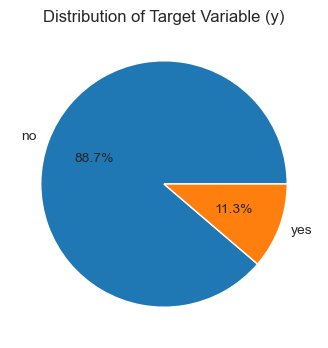

In [13]:
# Calculate class imbalance
target_counts = df['y'].value_counts()

plt.figure(figsize=(6, 4))
# sns.countplot(x='y', data=df, palette='viridis')
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Target Variable (y)')
plt.show()

## 3. Univariate Analysis
Analyzing independent variables one by one.

In [ ]:
# Separate num and cat columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

categorical_cols.remove('y')
    
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### Numerical Features Distribution

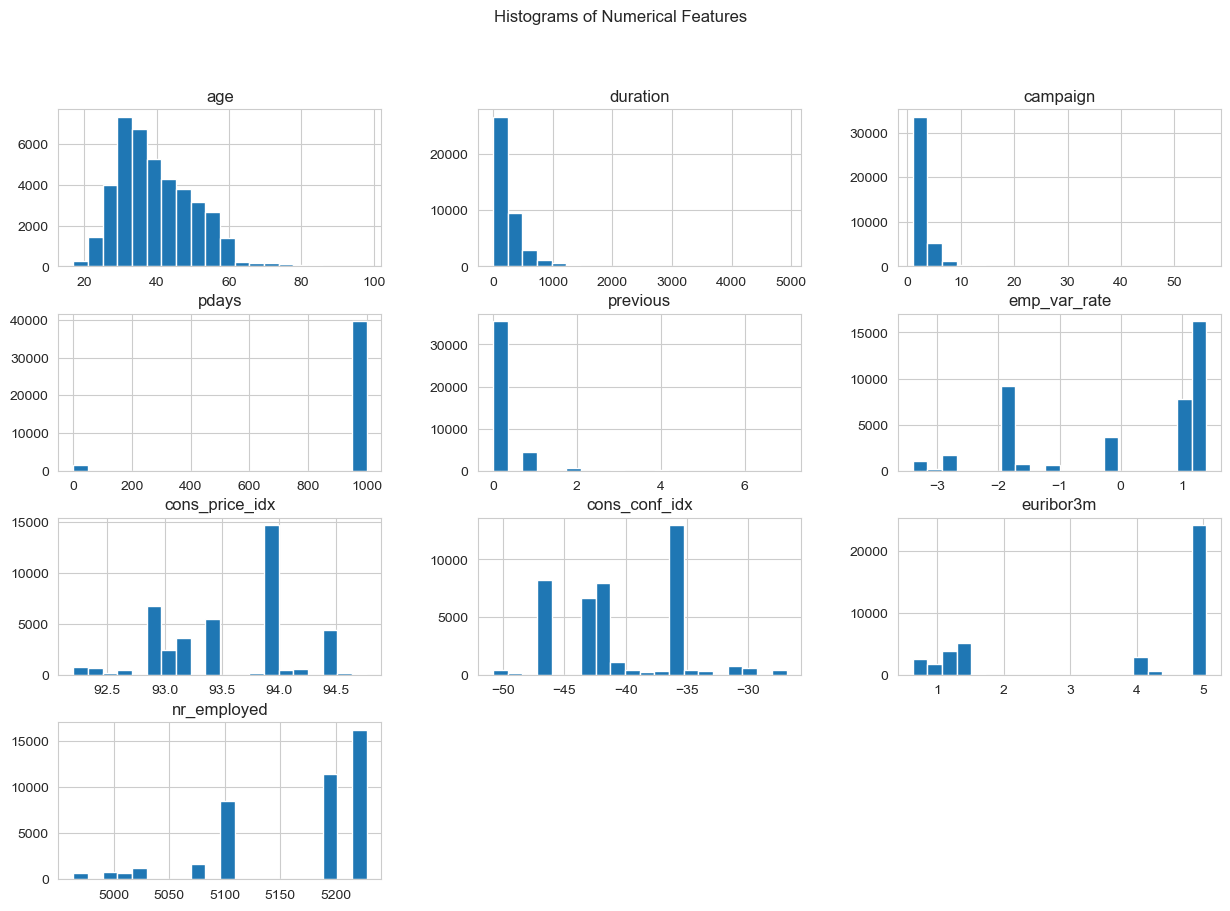

In [29]:
# Plot histograms for numeric features
df[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

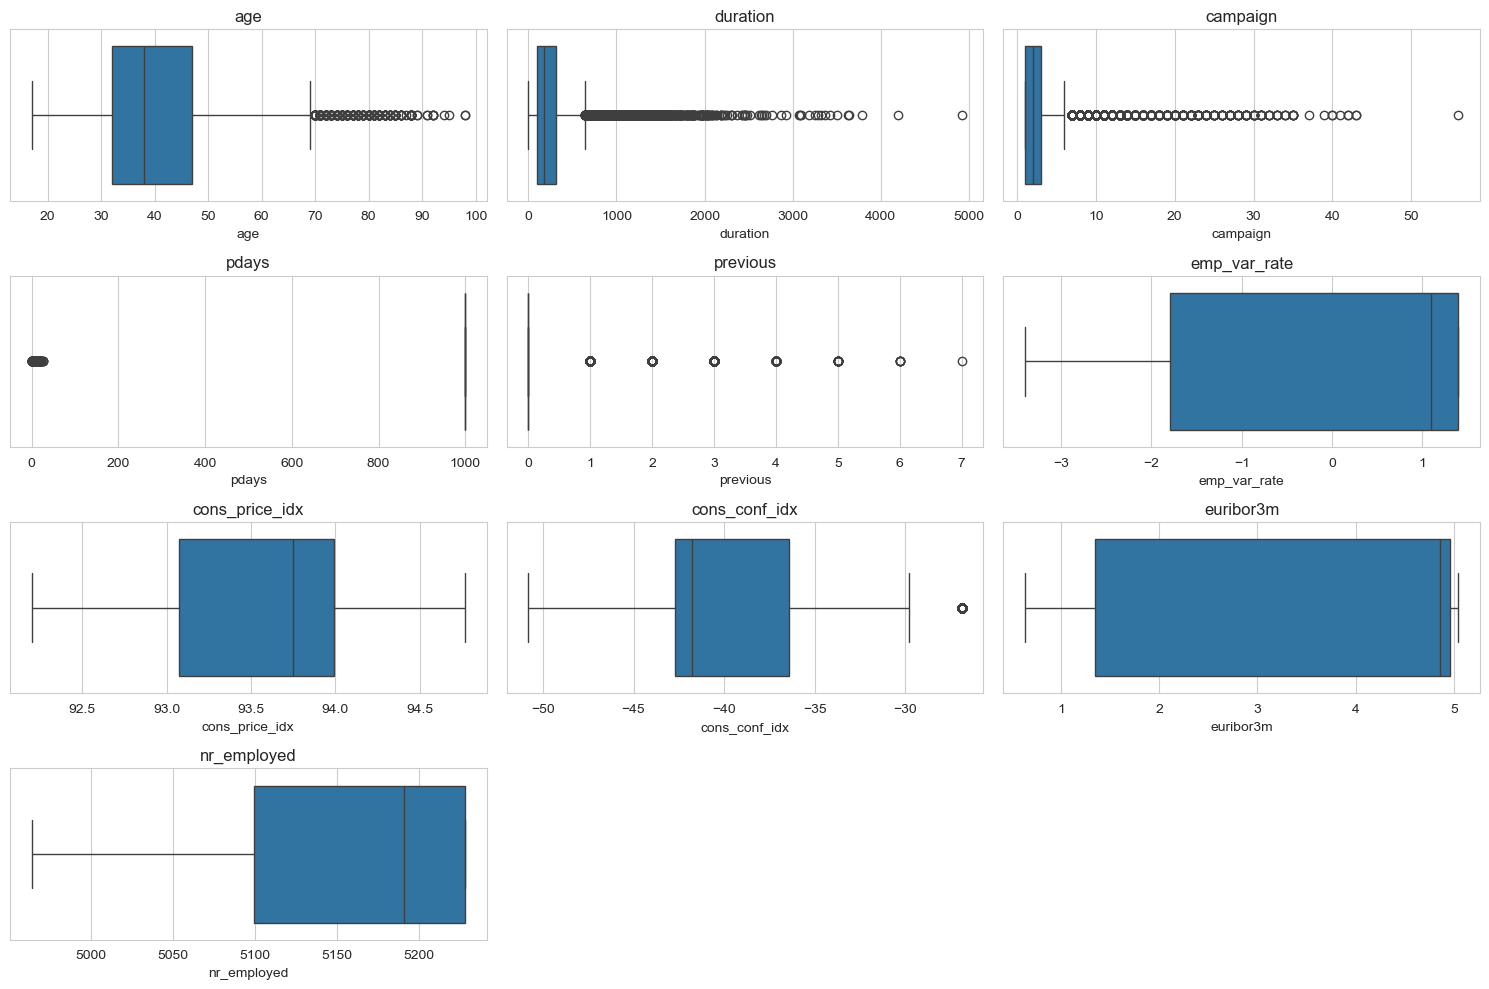

In [31]:
# Boxplots to check outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Check `pdays`, `previous`, `duration`, `campaign`

- `duration`: large values are true. Leave it be for now, since most models used are tree-based models.
- `pdays` & `previous`: These two share overlapping information. pdays = 999 typically means there's no previous campaign in this client's history (hence, previous = 0). Since we'll mostly be using tree-based models, can leave it be. 
    - The concern is, however, $n_{pdays = 999} = 39673$ and $n_{previous = 0} = 35563$ are inconsistent. The $n_{poutcome = 'nonexistent'} = 35563$ corroborates `previous` data that 35563 clients had no previous campaign.
    - We have no insight on what causes 4110 more 999s in `pdays`. Could be real that these clients' previous campaign was so long ago that it was recorded as 999. -> **Leave it be for now**
    - From the subsequent bivariate analysis, we can see that `pdays` and `previous` are correlated (r = 0.59), but not highly. Keep all in.

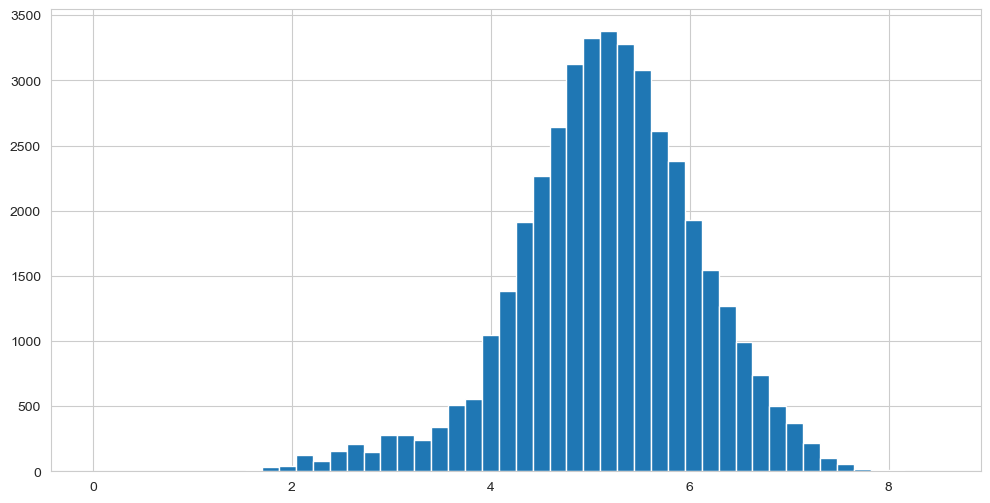

In [89]:
# df['duration'].hist(bins = 50)
df['duration'].transform(lambda x: np.log(1+x)).hist(bins = 50)
plt.show()

In [87]:
df.previous.value_counts(), df.pdays.value_counts().sort_index(ascending = False)

(previous
 0    35563
 1     4561
 2      754
 3      216
 4       70
 5       18
 6        5
 7        1
 Name: count, dtype: int64,
 pdays
 999    39673
 27         1
 26         1
 25         1
 22         3
 21         2
 20         1
 19         3
 18         7
 17         8
 16        11
 15        24
 14        20
 13        36
 12        58
 11        28
 10        52
 9         64
 8         18
 7         60
 6        412
 5         46
 4        118
 3        439
 2         61
 1         26
 0         15
 Name: count, dtype: int64)

### Categorical Features Distribution

In [35]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

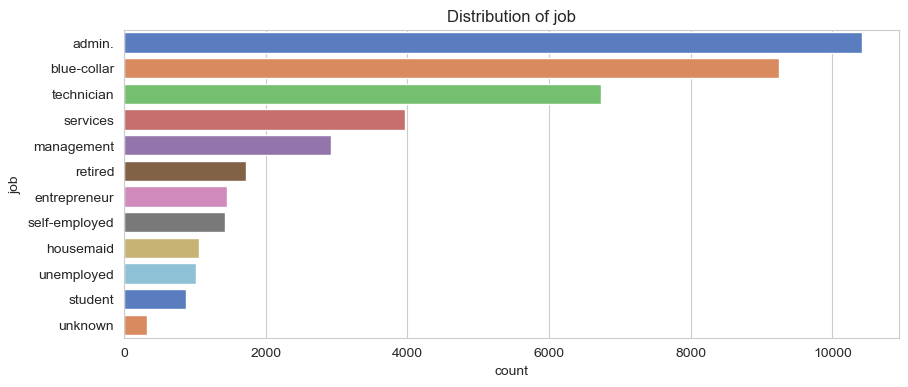

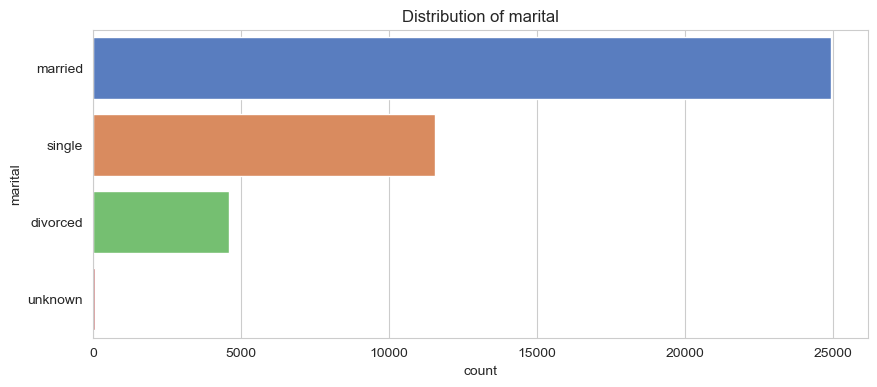

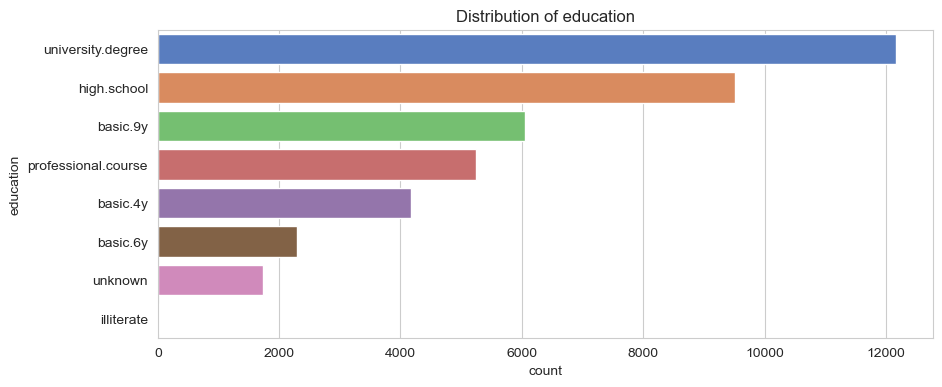

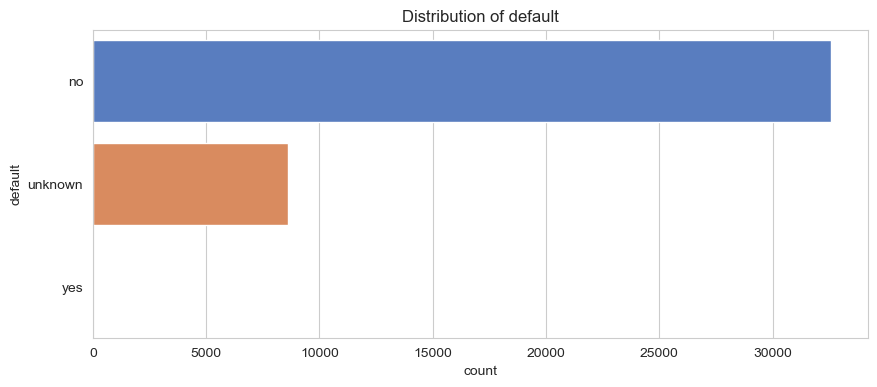

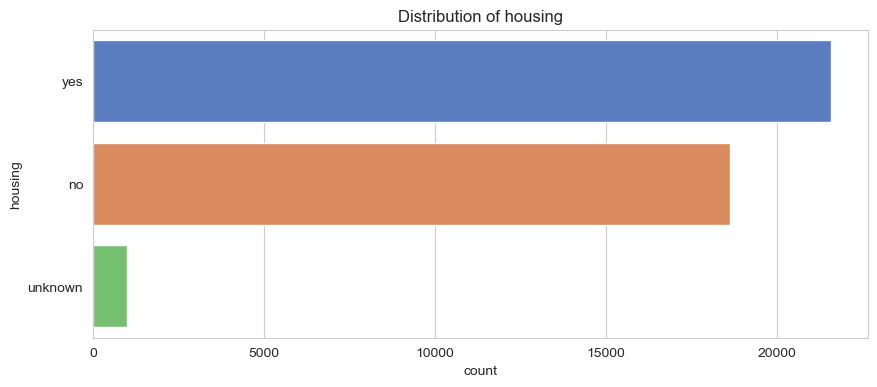

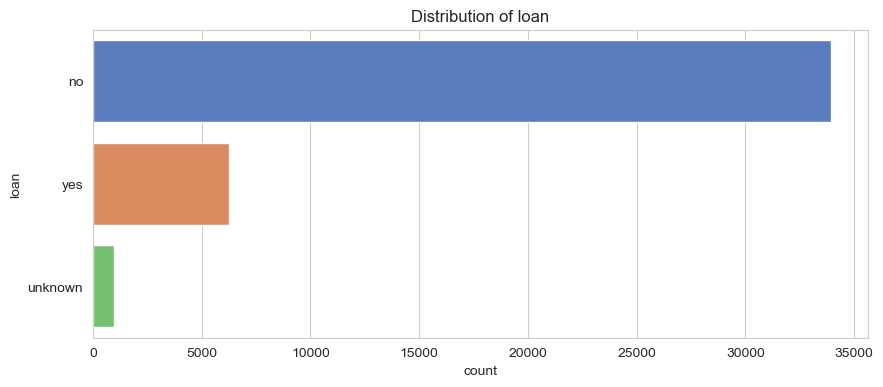

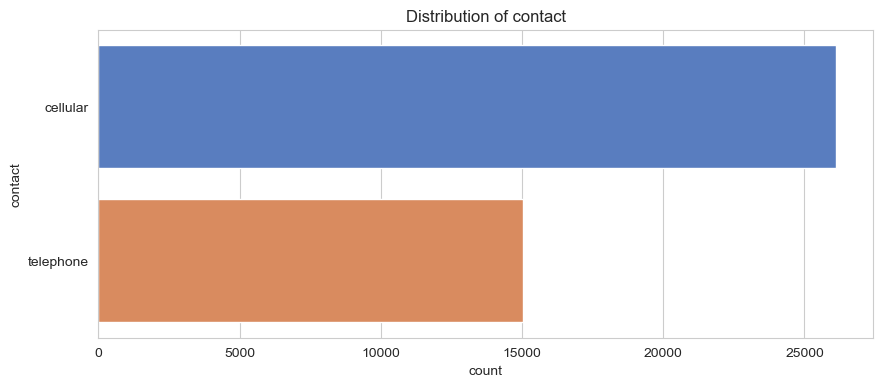

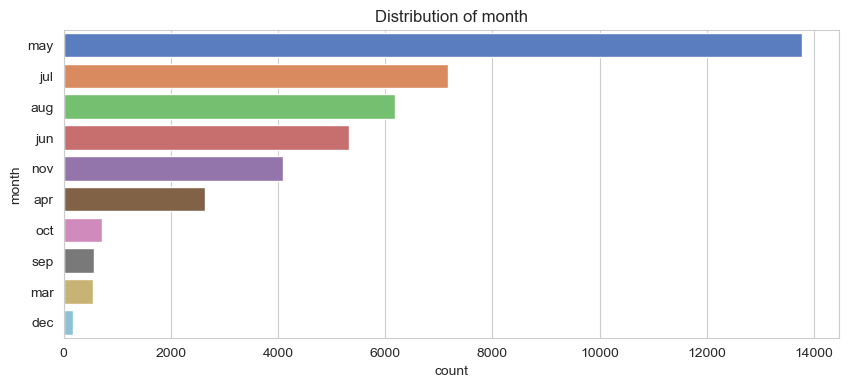

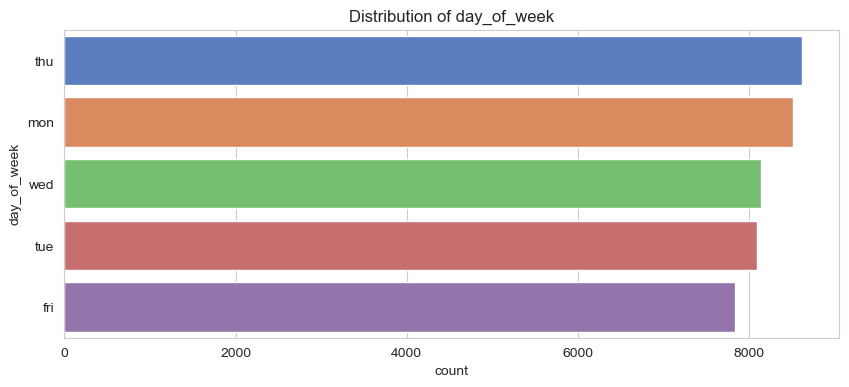

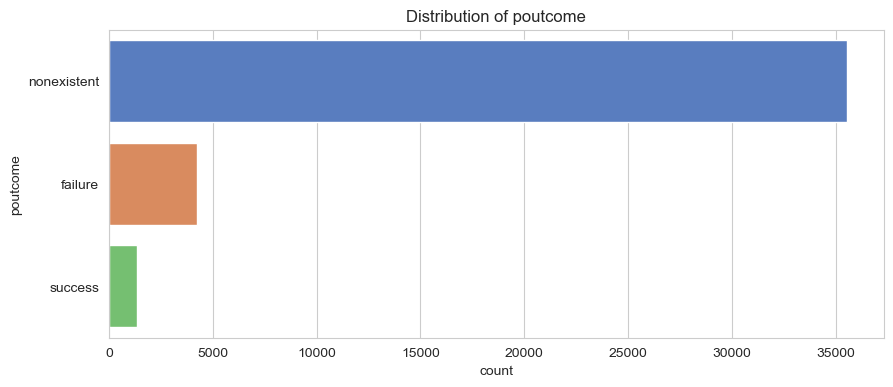

In [22]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')
    plt.title(f'Distribution of {col}')
    plt.show()

Three columns have rare values:
- `default`: 3 'yes' (into 'unknown')
- `education`: 18 'illiterate' (collapse into 'unknown')
- `marital`: 80 'unknown' (let it be)

df is modified at the end.

## 4. Bivariate Analysis
Analyzing the relationship between features and the target variable.

### Numeric vs Target

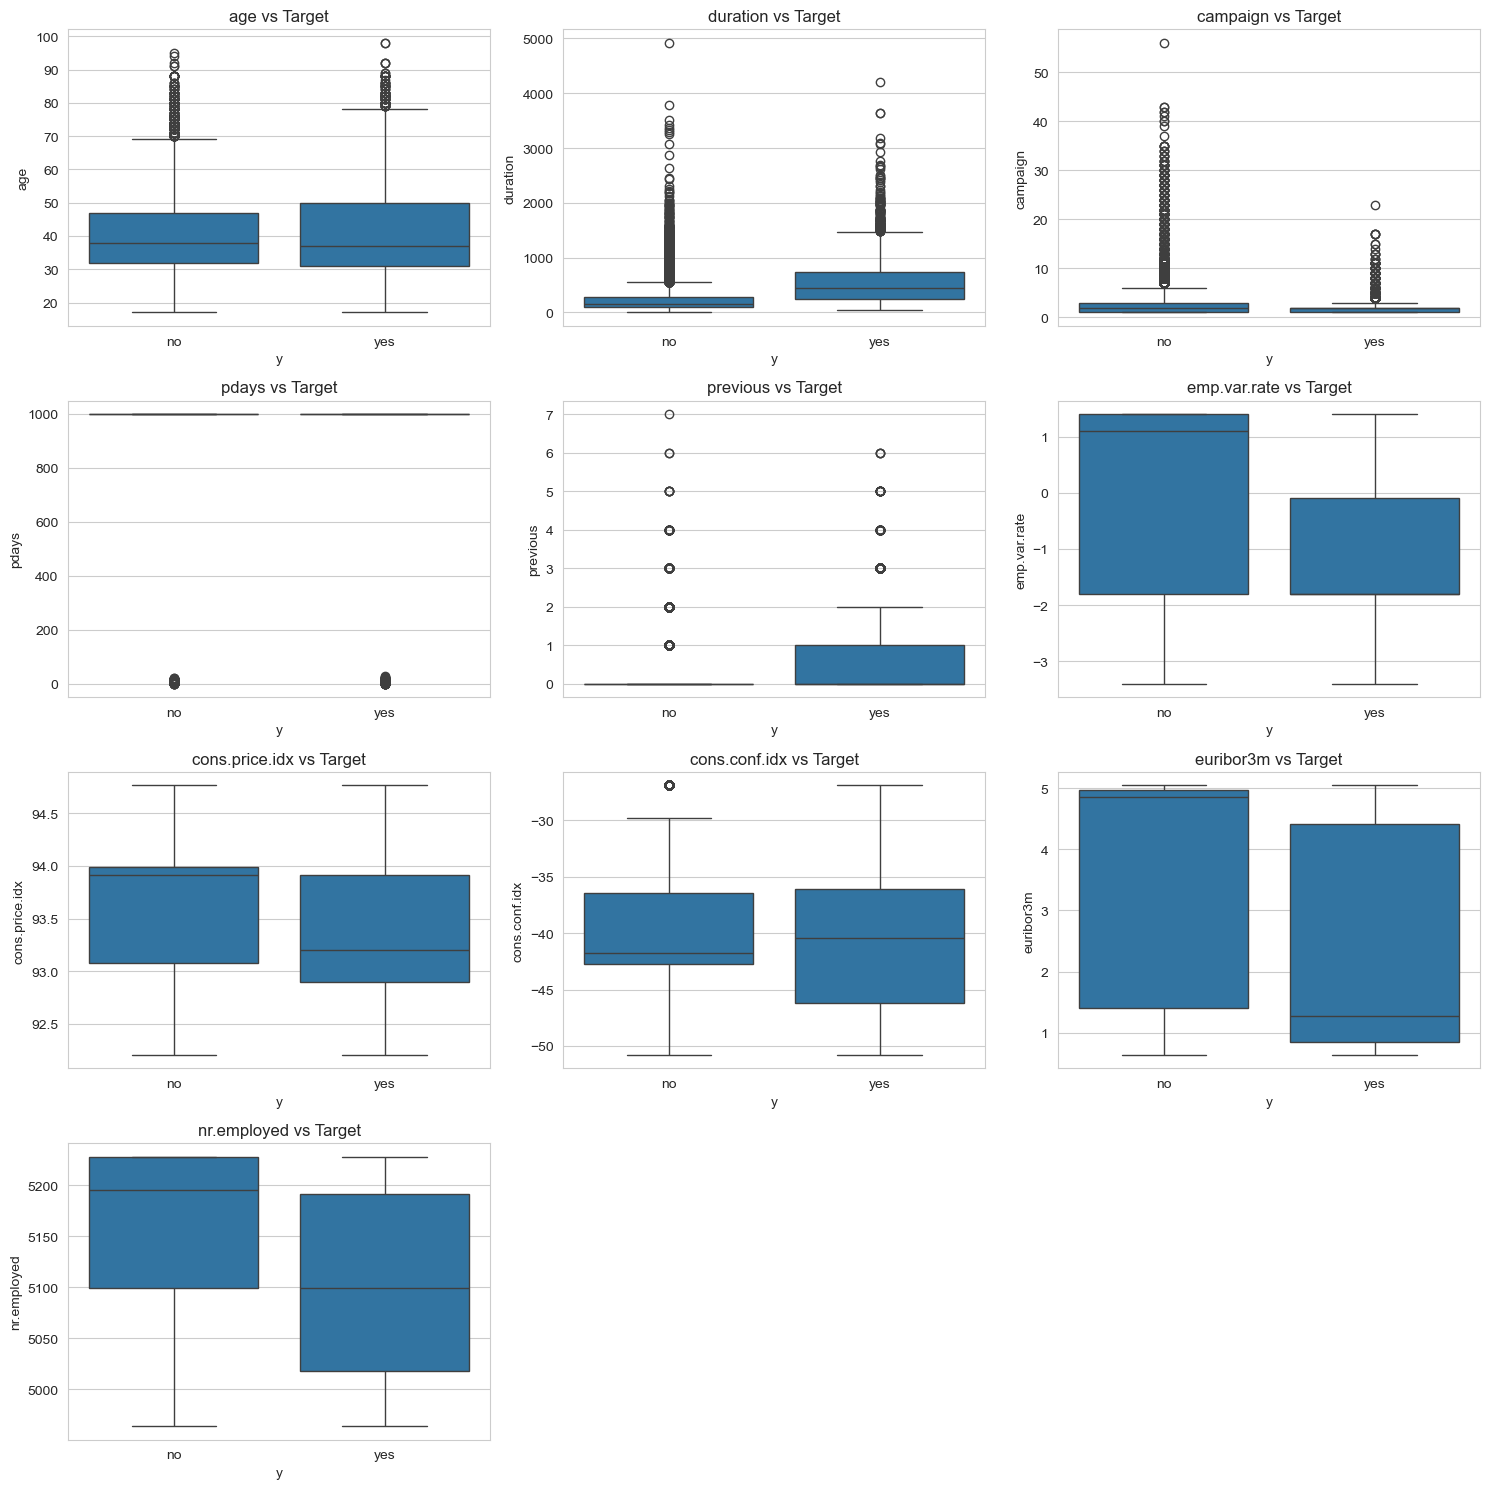

In [ ]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

Key observations:
- `duration`: shows a very strong relationship (longer calls -> higher subscription rate).
- `euribor3m`, `nr_employed`: Economic indicators show distinct distributions for 'yes' vs 'no'.

### Categorical vs Target

In [104]:
df.groupby('default')['y'].value_counts(normalize=True).unstack()

y,no,yes
default,,
no,0.87121,0.12879
unknown,0.94847,0.05153
yes,1.00000,NaN


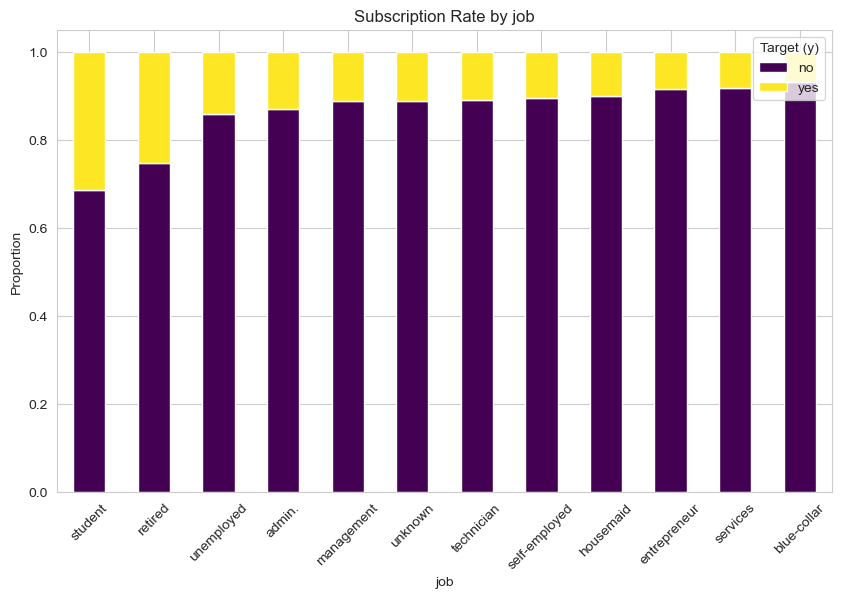

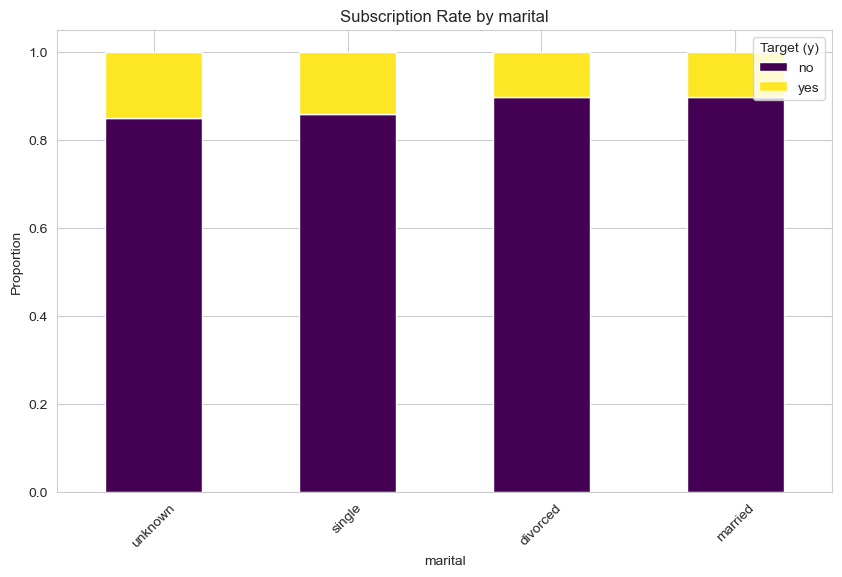

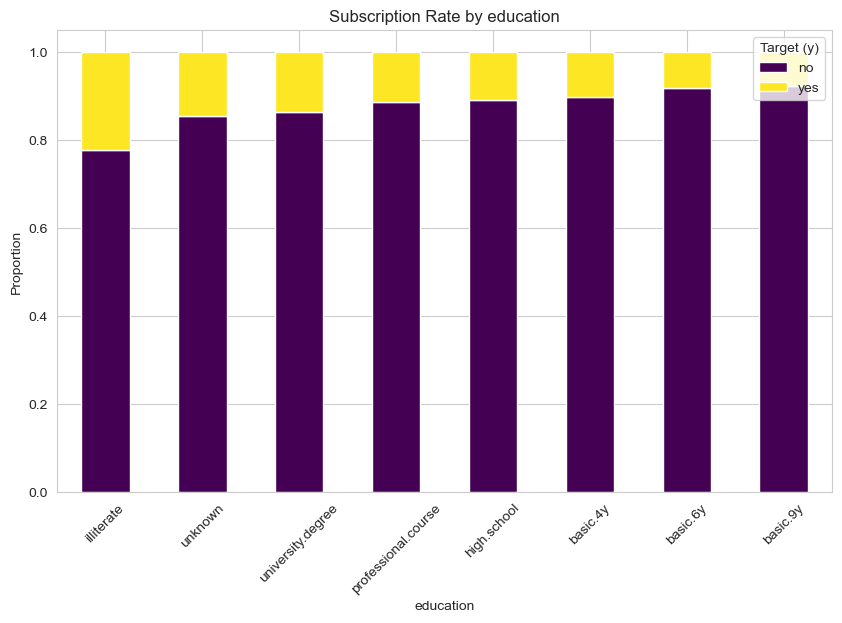

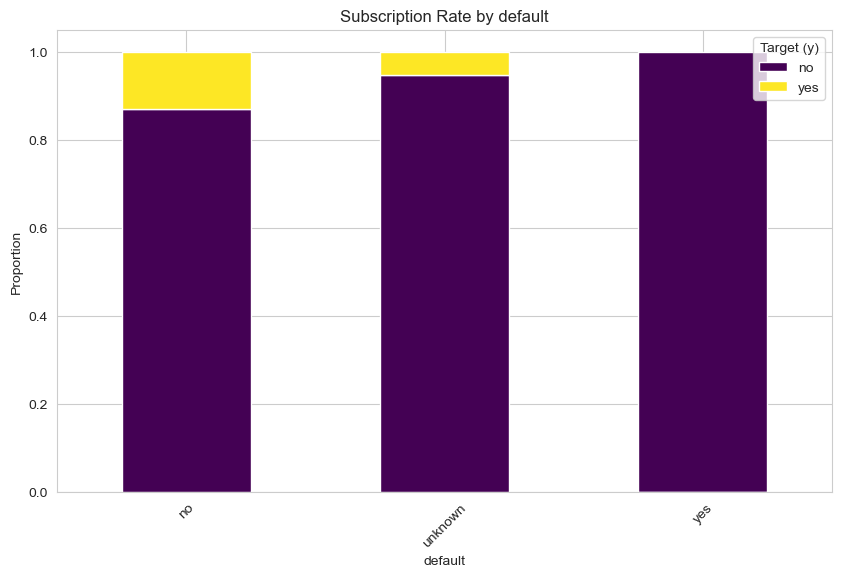

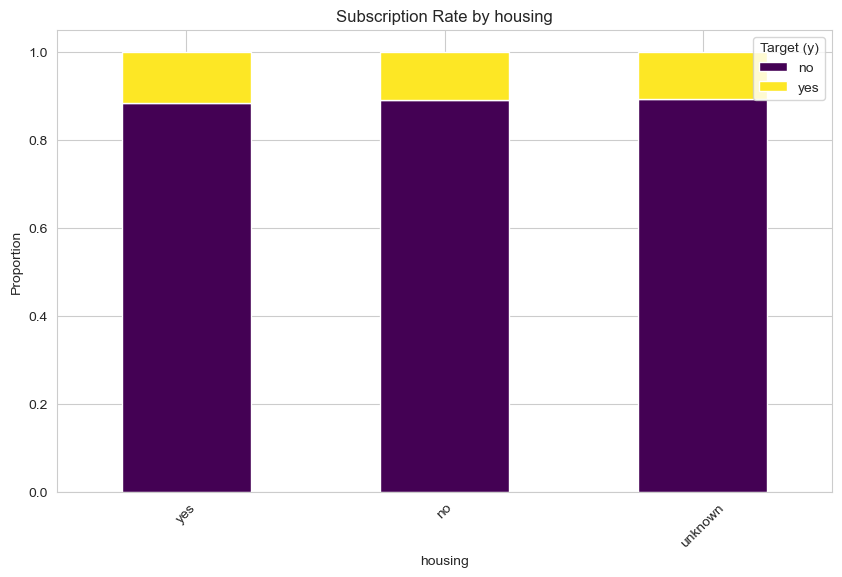

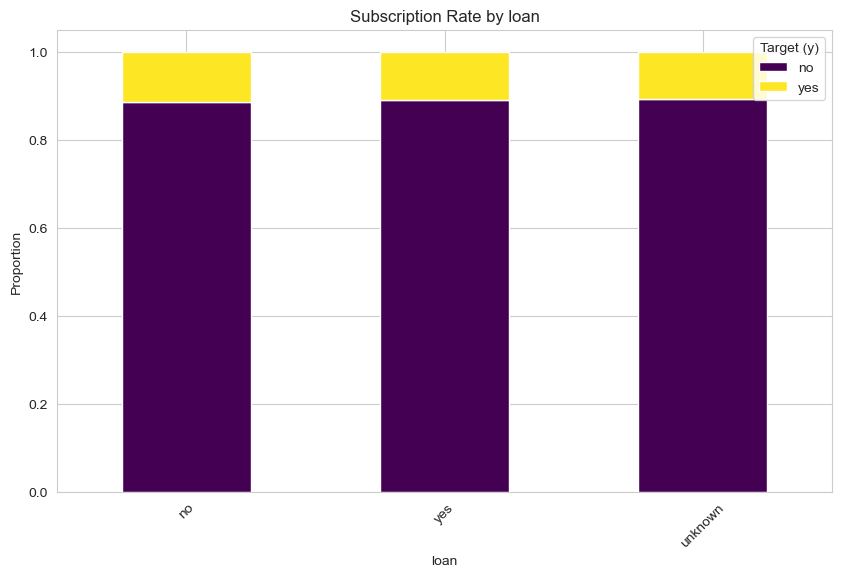

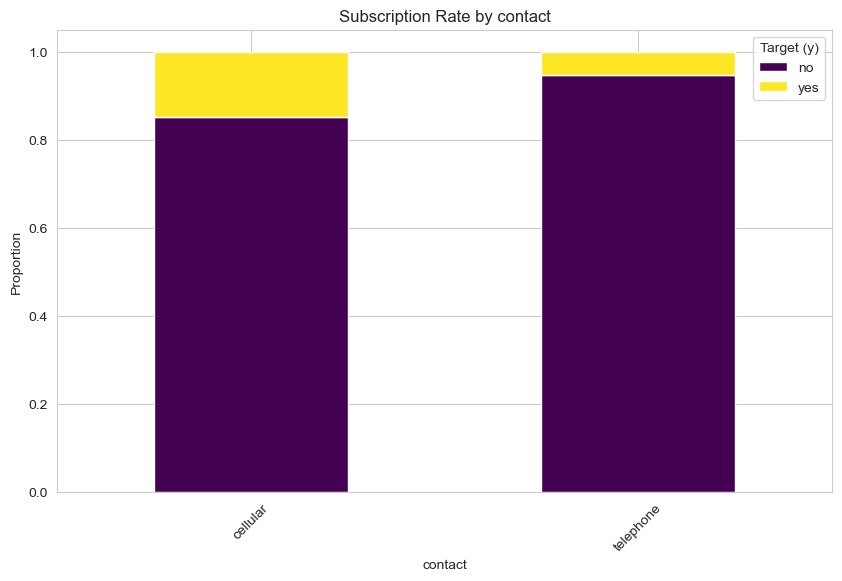

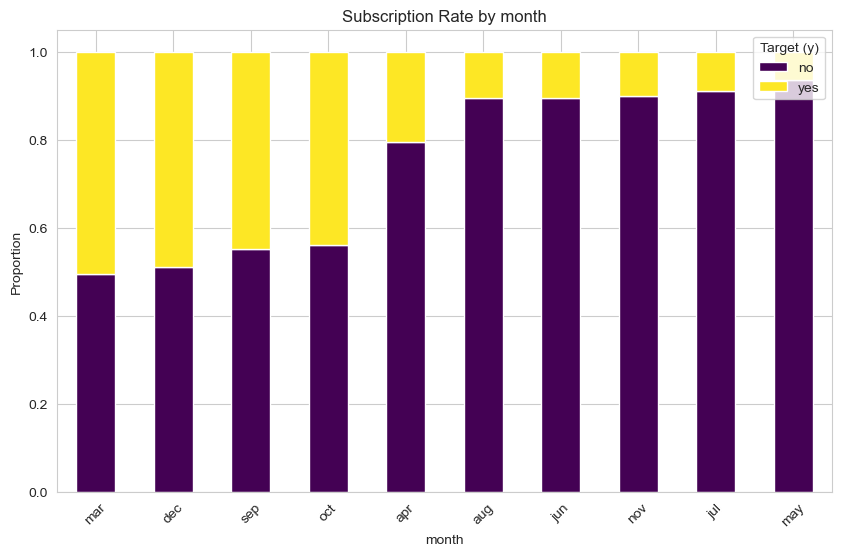

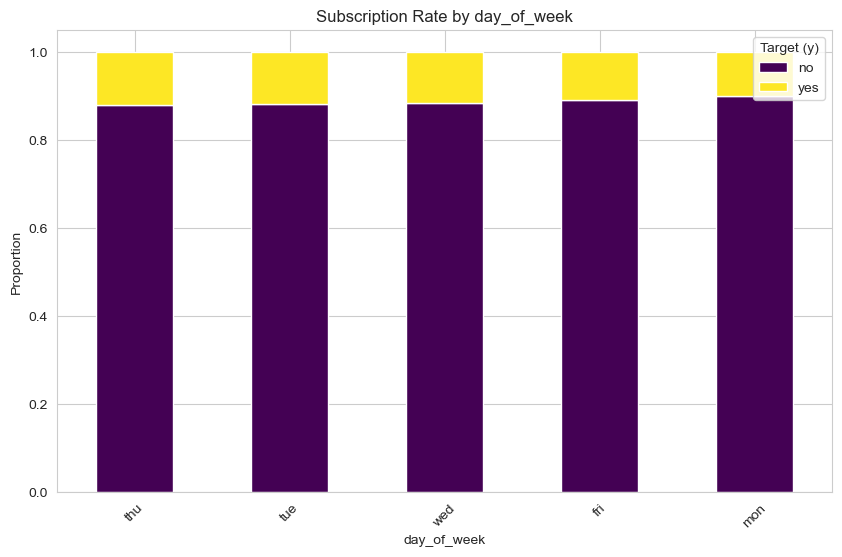

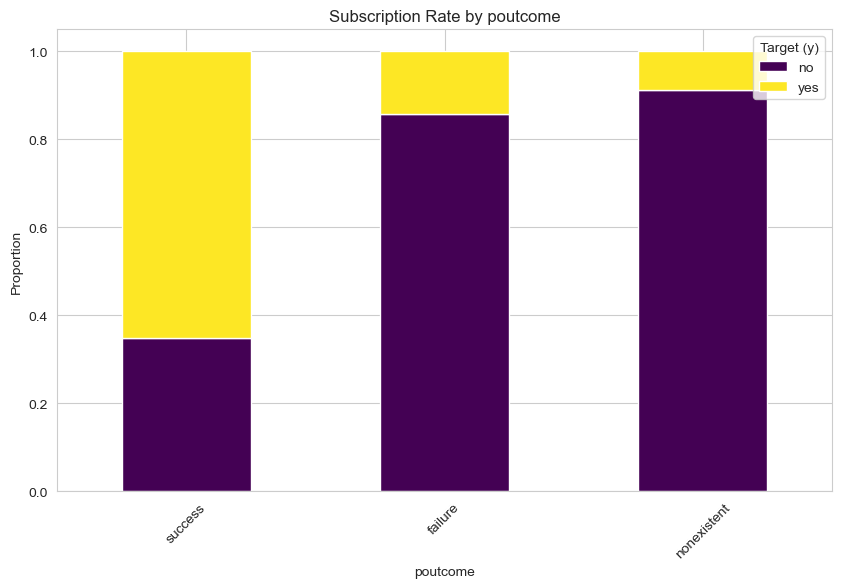

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Calculate proportion of 'yes' for each category
    prop_df = df.groupby(col)['y'].value_counts(normalize=True).unstack()
    if 'yes' in prop_df.columns:
        prop_df = prop_df.sort_values('yes', ascending=False)
    
    prop_df.plot(kind='bar', stacked=True, colormap='viridis', rot=45)
    plt.title(f'Subscription Rate by {col}')
    plt.ylabel('Proportion')
    plt.legend(title='Target (y)', loc='upper right')
    plt.show()

## 5. Correlation Analysis

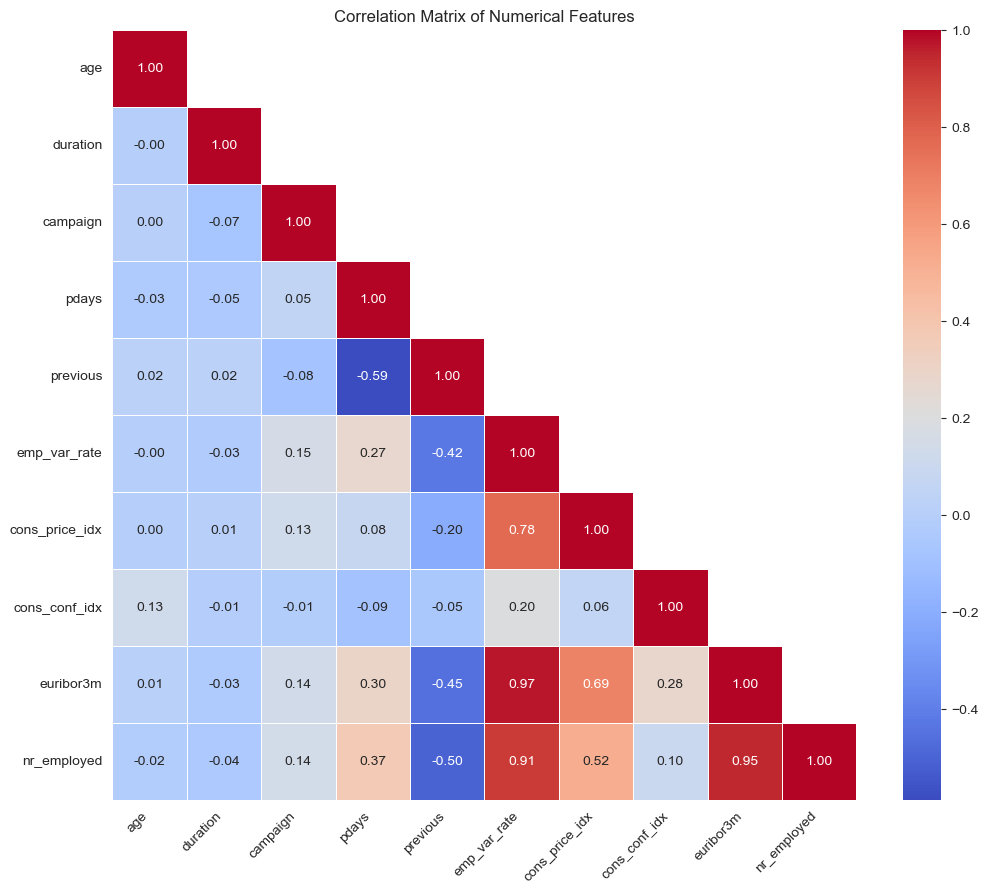

In [ ]:
# Correlation Matrix for numerical features
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Numerical Features')
plt.grid(False)
plt.show()

Strong correlations to note:
- `emp_var_rate`, `euribor3m`, `nr_employed` are highly correlated with each other, representing the economic context.

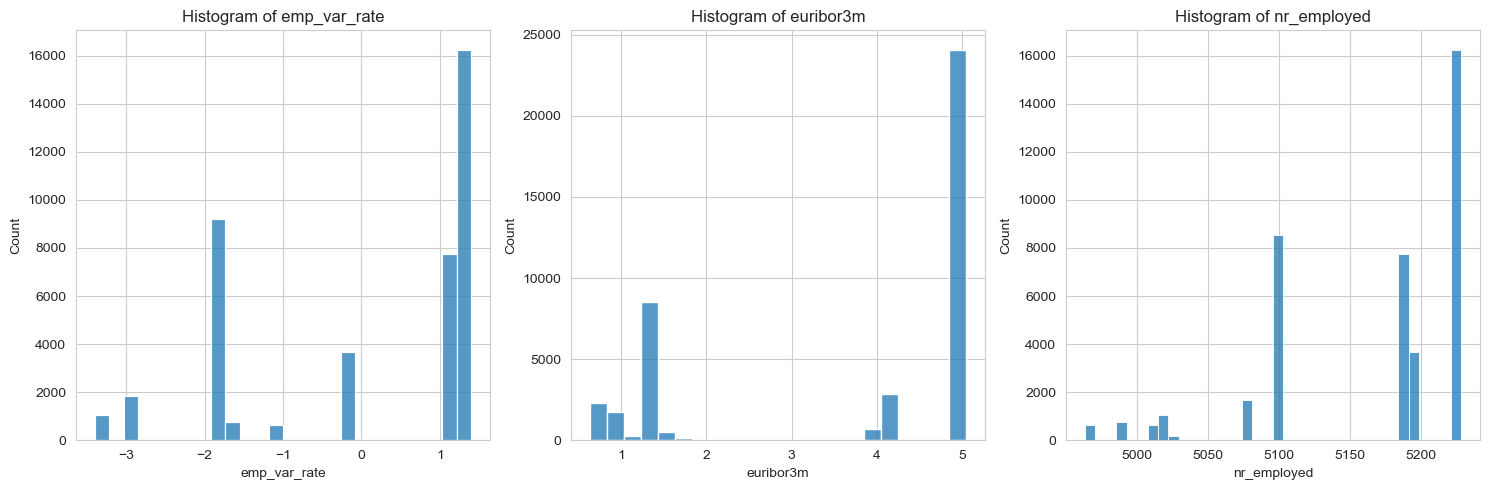

In [114]:
hc_cols = ['emp_var_rate', 'euribor3m', 'nr_employed']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(hc_cols):
    sns.histplot(df[col], ax=ax[i])
    ax[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [118]:
for col in hc_cols:
    print(f"{col} unique values:")
    print(df[col].unique())
    print("-" * 20)

emp_var_rate unique values:
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
--------------------
euribor3m unique values:
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.937 0.933 0.927 0.921 0.914 0.908 0.903 0.899
 0

Among these three indicators, keep euribor3m as it has the daily information (more granual) and remove the other two.

## 6. Dataframe Manipulation

- drop `emp_var_rate` and `np_employed` columns
- replaced 'yes' with 'unknown' in `default` column
- replaced 'illiterate' with 'unknown' in `education` column.

In [119]:
# Data manipulation: 

df['default'] = df['default'].transform(lambda x: x.replace('yes', 'unknown'))
df['education'] = df['education'].transform(lambda x: x.replace('illiterate', 'unknown'))

df.drop(['emp_var_rate', 'nr_employed'], axis=1, inplace=True)

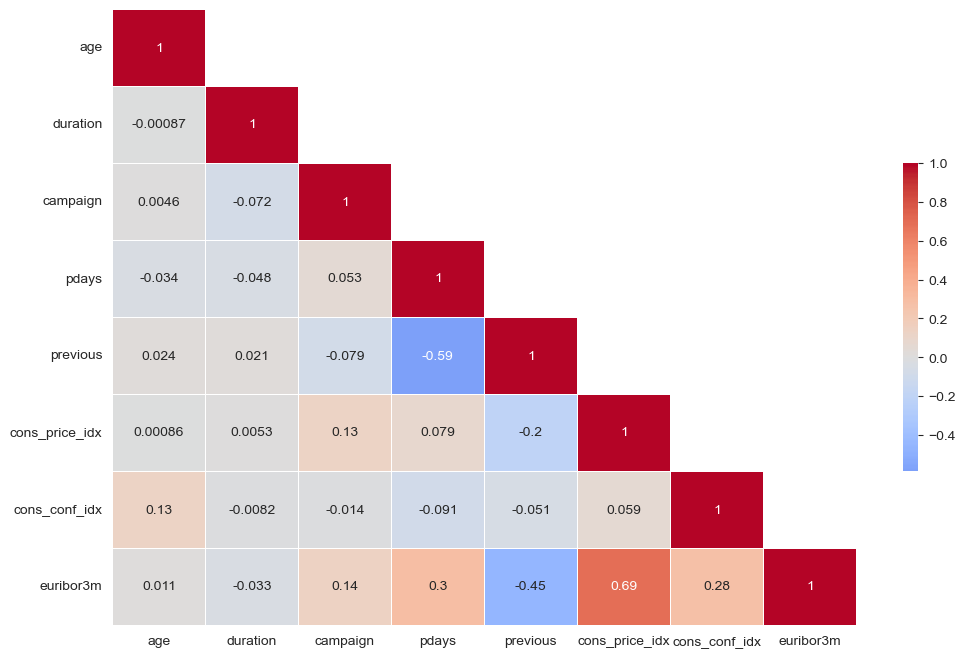

In [133]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[[cols for cols in df.columns if df[cols].dtype != 'object']].corr(),
            annot=True,
            mask = np.triu(np.ones_like(df[[cols for cols in df.columns if df[cols].dtype != 'object']].corr(), dtype=bool), k = 1),
            cmap = 'coolwarm',
            center = 0,
            linewidths = 0.5,
            cbar_kws = {'shrink': 0.5})
plt.grid(False)
plt.show()

In [ ]:
df.to_csv('data/bank-additional-full-cleaned.csv', index=False)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no
